<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση.</p>

In [ ]:
%matplotlib inline

import random
import itertools
import matplotlib
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.sparse import csr_matrix
from sklearn.cluster import SpectralClustering

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

<p style=text-align:justify>Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.</p>

In [ ]:
# Create the initial population
def create_population(m):
    population = []
    for i in range(m):
      population.append(list(np.random.randint(2, size=20)))
    return population

# Calculate fitness of chromosomes
def find_fitness(chromosome):
    return np.sum(chromosome)

# Select chromosomes to pass to next population proportionally to their fitness
def proportional_selection(population, elitism):
  summary = find_fitness(population)
  new_population = []
  
  # Λίστα που περιέχει τα indexes της ταξινομημένης fitness_list 
  sort_list = sorted(population, key=sum, reverse=True)

  # Εφαρμογή ελιτισμού στα πρώτα x χρωμοσώματα
  for i in sort_list[0:elitism]:
    new_population.append(i)


  for j in range(len(population)-elitism):
    x = random.uniform(0,1)
    i = 0
    while(i<(len(population)-elitism) and x > (find_fitness(population[0:i+1])/summary)):
      i = i + 1
    new_population.append(population[i])
  return new_population

# Apply crossover to a population with probability pc
def crossover(population, pc):
  m = len(population)

  for i in range(0,m,2):
    if (random.uniform(0,1) < pc):
      pos = random.randint(0,20)

      for k in range(pos,20):
        aux = population[i][k]
        population[i][k] = population[i+1][k]
        population[i+1][k] = aux

# Apply mutation to a population with probability pm
def mutation(population, pm):
  m = len(population)

  for i in range(m):
    for k in range(20):
      if (random.uniform(0,1) < pm):
        population[i][k] = 1 - population[i][k]

# Main genetic algorithm
def genetic_algorithm(m, pc, pm, elitism):
  counter = 0
  max_fit = 0
  fit_list = []
  population = create_population(m)

  while(counter < 30):
    population = proportional_selection(population, elitism)
    crossover(population, pc)
    mutation(population, pm)
    
    fitness = max(find_fitness(population[i]) for i in range(m))
    fit_list.append(fitness)
    if (fitness > max_fit):
      max_fit = fitness

    # Έλεγχος δεύτερου κριτηρίου
    if (counter >= 5):
      if(fit_list[-1] == fit_list[-2] == fit_list[-3] == fit_list[-4] == fit_list[-5]):
        break
    
    counter = counter + 1

  return max_fit

#### Εφαρμογή του γενετικού αλγορίθμου για όλες τις περιπτώσεις παραμέτρων.

In [ ]:
for m in range (10,110,10):
  for pc in np.arange (0.3, 1.0, 0.1):
    for pm in np.arange (0.01, 0.21, 0.01):
      for elitism in range (0,4):
        print("Για πληθυσμό "+str(m)+", με πιθανότητα διασταύρωσης "+str(round(pc,2))+", πιθανότητα μετάλλαξης "+str(round(pm,2))+" και ελιτισμό",elitism,", έχουμε max_fitness: "+str(genetic_algorithm(m, pc, pm, elitism)))

Streaming output truncated to the last 5000 lines.
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.11 και ελιτισμό 0 , έχουμε max_fitness: 15
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.11 και ελιτισμό 1 , έχουμε max_fitness: 15
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.11 και ελιτισμό 2 , έχουμε max_fitness: 14
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.11 και ελιτισμό 3 , έχουμε max_fitness: 15
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.12 και ελιτισμό 0 , έχουμε max_fitness: 15
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.12 και ελιτισμό 1 , έχουμε max_fitness: 15
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.12 και ελιτισμό 2 , έχουμε max_fitness: 16
Για πληθυσμό 20, με πιθανότητα διασταύρωσης 0.3, πιθανότητα μετάλλαξης 0.12 και ελιτισμό 3 , έχουμε max_fitness: 17
Για πληθυσμό 20, με π

#### Γραφικές παραστάσεις

Επειδή είναι δύσκολο να αποτυπώσουμε γραφικά όλα τα παραπάνω αποτελέσματα, επιλέγουμε κρατώντας σταθερές τις τρεις παραμέτρους να μεταβάλουμε την τέταρτη στο όριο που τρέξαμε και πριν. Έτσι δημιουργούμε τέσσερις γραφικές παραστάσεις.

In [ ]:
num_list = [genetic_algorithm(m, 0.8, 0.1, 3) for m in range (10,110,10)]

In [ ]:
pc_list = [genetic_algorithm(80, pc, 0.1, 3) for pc in np.arange (0.3, 1.0, 0.1)]

In [ ]:
pm_list = [genetic_algorithm(80, 0.8, pm, 3) for pm in np.arange (0.01, 0.21, 0.01)]

In [ ]:
elitism_list = [genetic_algorithm(80, 0.8, 0.1, elitism) for elitism in range (0,4)]

Text(0, 0.5, 'Fitness Function')

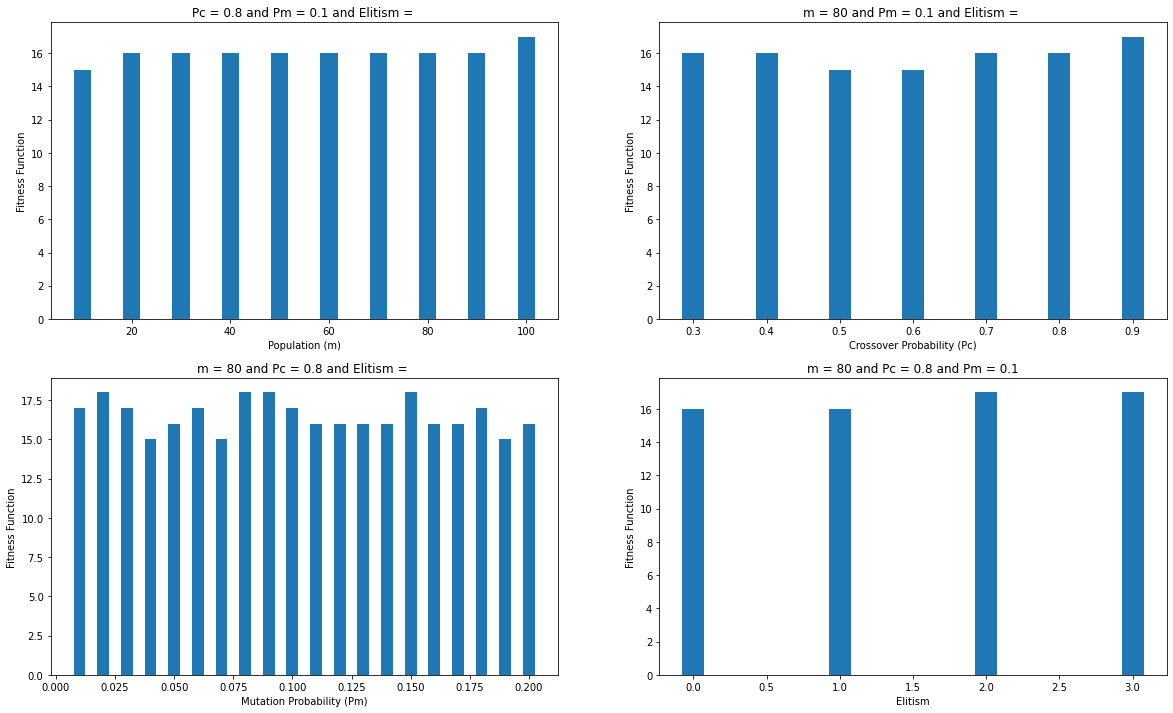

In [ ]:
#Διαγράμματα
fig, axs = plt.subplots(2,2,figsize=(20,12))

axs[0][0].bar(range(10,110,10), num_list, width=3.5)
axs[0][0].set_title("Pc = 0.8 and Pm = 0.1 and Elitism = ")
axs[0][0].set_xlabel('Population (m)')
axs[0][0].set_ylabel('Fitness Function')

axs[0][1].bar(np.arange (0.3, 1.0, 0.1), pc_list, width=0.03)
axs[0][1].set_title("m = 80 and Pm = 0.1 and Elitism = ")
axs[0][1].set_xlabel('Crossover Probability (Pc)')
axs[0][1].set_ylabel('Fitness Function')

axs[1][0].bar(np.arange (0.01, 0.21, 0.01), pm_list, width=0.005)
axs[1][0].set_title("m = 80 and Pc = 0.8 and Elitism = ")
axs[1][0].set_xlabel('Mutation Probability (Pm)')
axs[1][0].set_ylabel('Fitness Function')

axs[1][1].bar(range (0,4), elitism_list, width=0.15)
axs[1][1].set_title("m = 80 and Pc = 0.8 and Pm = 0.1")
axs[1][1].set_xlabel('Elitism')
axs[1][1].set_ylabel('Fitness Function')

#### Σχόλια - Παρατηρήσεις

*   Με βάση τα παραπάνω αποτελέσματα, παρατηρούμε καταρχάς, ότι **χωρίς ελιτισμό**, κατά μέσω όρο, πετυχαίνουμε μικρότερο fitness score σε σχέση με τον αν χρησιμοποιούμε ελιτισμό. Αυτό είναι σχετικά αναμενόμενο από την θεωρία, καθώς δεν χρησιμοποιούμε κάποιο είδος μηχανισμού για να αποθηκεύουμε την βέλτιστη λύση που έχουμε βρει μέχρι κάθε σημείο. Το μοναδικό που κάνουμε είναι ότι, μέσω της μη ισορροπημένης ρουλέτας, δίνουμε περισσότερες πιθανότητες να περάσουν στην νέα γενιά τα χρωµοσώµατα με την μεγαλύτερη fitness function. Αυτό προφανώς και είναι πιθανοτικό. Ενώ, **μέσω του ελιτισμού**, σίγουρα τα "καλύτερα" χρωµοσώµατα θα περάσουν στην επόμενη γενιά. Όσο αναφορά **το πλήθος των χρωμοσωμάτων** που θα περάσουν στην επόμενη γενιά, με βάση τα αποτελέσματα αλλά και τα διαγράμμτα, παρατηρούμε ότι ειδικά για πληθυσμούς μεγαλύτερους του 50, όσο μεγαλύτερη είναι η τιμή του ελιτισμού, τόσο καλύτερα, κατά μέσο όρο, αποτελέσματα θα πάρουμε.

*   Επιπλέον, σύμφωνα με τα αποτελέσματα καθώς και τα διαγράμματα, γίνεται αντιλυπτό ότι όσο περισσότερο αυξάνεται ο **πληθυσμός m**, τόσο βελτιώνεται σταδικά το fitness function. Αυτό είναι αναμενόμενο διότι, έχοντας μεγαλύτερη ποικιλία χρωμοσωμάτων, είναι πιο πιθανόν να πετύχουμε καλύτερο score.

*   Όσο αναφορά την **πιθανότητα διασταύρωσης (Pc)**, από θεωρία γνωρίζουμε ότι όσο πλησιάζει σε μεγαλύτερες τιμές (0.9), τόσο καλύτερα αποτελέσματα θα δούμε. Αυτό το παρατηρούμε κατά μέσο όρο και στα αποτελέσματα, αλλά και σε ένα βαθμό στα διαγράμματα.

*   Τέλος, για την **πιθανότητα μετάλλαξης (Pm)**, παρατηρούμε ότι κατά μέσο όρο, οι μικρότερες τιμές παρουσιάζουν καλύτερo fitness score. Αυτό συμφωνεί με την θεωρία μας που αναφέρει ότι το ιδανικό Pm βρίσκεται κοντά στο 1%, δηλαδή 0.01.

*   Αξίζει να σημειωθεί επίσης ότι όλα τα παραπάνω αποτελέσματα είναι πιθανοτικά και πολλές φορές δεν συμβαδίζουν με τα θεωρητικά. Στις περιπτώσεις που εμφαρμόσαμε ελιτισμό, πήραμε καλύτερα fitness score, καθώς μεταφέρονται στις επόμενες γενιές τα βέλτιστα χρωµοσώµατα.




### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

<p style=text-align:justify>Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.</p>

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
<p style=text-align:justify>Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.</p>

##### Αρχικοποίηση
<p style=text-align:justify>Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.</p>

##### Συνάρτηση Fitness
<p style=text-align:justify>Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.</p>

##### Επιλογή (Selection)
<p style=text-align:justify>Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό, δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.</p>

##### Διασταύρωση (Crossover)
<p style=text-align:justify>Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.</p>

##### Μετάλλαξη (Mutation)
<p style=text-align:justify>Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.</p>

##### Κριτήριο Τερματισμού (Stopping Criterion)
<p style=text-align:justify>Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.</p>

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

<p style=text-align:justify>Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.</p>


In [ ]:
### ATTENTION: don't change because the variables are used in the given code
### the use of the converted graph is optional

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [ ]:
# Create the initial population
def create_population(G):

  # Δημιουργία λίστας γειτόνων ώστε να γνωρίζουμε τους γείτονες κάθε κόμβου και να κάνουμε τυχαία επιλογή
  neighbor_list = []
  for i in list(G.nodes):
    neighbor_list.append(list(G.neighbors(i)))
  
  # Δημιουργία πληθυσμού, δημιουργώντας 300 χρωμοσώματα το κάθε ένα από τα οποία έχει n στοιχεία
  population = []
  for i in range(300):
    chromosome = []
    for k in range(len(G.nodes)):
      chromosome.append(np.random.choice(neighbor_list[k], 1)[0])
    population.append(chromosome)

  return population


# Calculate fitness of chromosomes
def find_fitness(chromosome, G):
  
  # Adjacency Matrix of G
  A = csr_matrix.toarray(nx.adj_matrix(G))

  # Δημιουργία προσωρινού γράφου από το χρωμόσωμα
  G_temp = nx.Graph()
  G_temp.add_nodes_from([i for i in range(len(G.nodes))])
  G_temp.add_edges_from([(i, chromosome[i]) for i in range(len(chromosome))])

  # Εύρεση ανεξάρτητων συνόλων στον προσωρινό γράφο του χρωμοσώματος
  components = [list(i) for i in list(nx.connected_components(G_temp))]

  # Αρχικοποίηση Community Score στο μηδέν
  CS = 0
  
  # Για κάθε component υπολογίζουμε το CS και το αθροίζουμε στο συνολικό
  for i in components:
    S = A[i][:,i]
    u_s = sum(sum(S))
    M_s = sum(np.mean(S, axis = 1)) / (S.shape[0])
    CS += M_s * u_s
  return CS


# Select chromosomes to pass to next population proportionally to their fitness
def proportional_selection(population, elitism, G):
  
  # Δημιουργία λίστας που περιέχει 300 Fitness Scores
  fitness_list = [find_fitness(i, G) for i in population]
  
  # Άθροισμα όλων των fitness scores
  summary = sum(fitness_list)

  # Λίστα που περιέχει τα indexes της ταξινομημένης fitness_list 
  sort_indexes = sorted(range(len(fitness_list)), key=lambda k: fitness_list[k], reverse=True)
  
  new_population = []

  # Εφαρμογή ελιτισμού στα πρώτα x χρωμοσώματα
  for i in sort_indexes[0:elitism]:
    new_population.append(population[i])
  
  # Για τα υπόλοιπα χρωμοσώματα εφαρμογή ρουλέτας
  for j in range(len(population)-elitism):
    x = random.uniform(0,1)
    i = 0
    
    temp_sum = fitness_list[0] / summary
    
    while(i<(len(population)-elitism) and x > temp_sum):
      i = i + 1
      temp_sum += fitness_list[i] / summary
    
    new_population.append(population[i])
  return new_population


# Apply crossover to population
def crossover(population, pc):
  # Έλεγχος κάθε ζεύγους i με i+1
  for i in range(0,300,2):
    if (random.uniform(0,1) < pc):

      # Uniform crossover με χρήση μάσκας
      mask = [np.random.randint(0,2) for z in population[0]]

      # Στις θέσεις όπου η μάσκα έχει άσσους, εναλλασσσουμε το i με το i+1
      for k in range(len(mask)):
        if (mask[k]==1):
          aux = population[i][k]
          population[i][k] = population[i+1][k]
          population[i+1][k] = aux


# Apply mutation to population
def mutation(population, pm, G):
  
  # Δημιουργία λίστας γειτόνων ώστε να γνωρίζουμε τους γείτονες κάθε κόμβου και να κάνουμε τυχαία επιλογή
  neighbor_list = []
  for i in list(G.nodes):
    neighbor_list.append(list(G.neighbors(i)))
  
  # Έλεγχος κάθε θέσης όλων των χρωμοσωμάτων
  for i in range(300):
    for k in list(G.nodes):
      if (random.uniform(0,1) < pm):        
        # Επιλογή τυχαίου γείτονα του κόμβου
        population[i][k] = np.random.choice(neighbor_list[k], 1)[0]


# Main genetic algorithm
def genetic_algorithm(G, pc, pm, elitism):
  
  # Αρχικοποίηση λίστας fitness scores
  fit_list = []

  # Δημιουργία αρχικού πληθυσμού
  population = create_population(G)
  counter = 0
  
  # Έλεγχος 1ης συνθήκης τερματισμού
  while(counter < 30):
    
    # Επιλογή
    population = proportional_selection(population, elitism, G)

    # Διασταύρωση
    crossover(population, pc)

    # Μετάλαξη
    mutation(population, pm, G)

    # Εύρεση μέγιστου fitness score
    max_fit = max([find_fitness(i, G) for i in population])
    fit_list.append(max_fit)
    
    # Έλεγχος δεύτερου κριτηρίου
    if(counter >= 5):
      if(fit_list[-1] == fit_list[-2] == fit_list[-3] == fit_list[-4] == fit_list[-5]):
        break
    # Αύξηση μετρητή
    counter = counter + 1

  return population, max_fit

In [ ]:
# Run the genetic algorithm for different values of the requested parameters
def run_algo (G):
  best_fit = 0
  for pc in [0.7, 0.8, 0.9]:
    for pm in [0.1, 0.2]:
      for elitism in [1, 2, 3]:
        pop, fitness = genetic_algorithm(G, pc, pm, elitism)
        print("Για Pc =", pc, ", Pm =", pm, ", Elitism = ", elitism, ": Fitness Score =",fitness)
        if (fitness > best_fit):
          best_fit = fitness
          best_pop = pop
          best_pc = pc
          best_pm = pm
          best_elitism = elitism

  return best_pop, best_fit, best_pc, best_pm, best_elitism

#### Football

In [ ]:
football_pop, football_fit, football_pc, football_pm, football_elitism = run_algo(football)

Για Pc = 0.7 , Pm = 0.1 , Elitism =  1 : Fitness Score = 175.94644750813472
Για Pc = 0.7 , Pm = 0.1 , Elitism =  2 : Fitness Score = 187.46449264734773
Για Pc = 0.7 , Pm = 0.1 , Elitism =  3 : Fitness Score = 203.26085379516698
Για Pc = 0.7 , Pm = 0.2 , Elitism =  1 : Fitness Score = 199.36819261022916
Για Pc = 0.7 , Pm = 0.2 , Elitism =  2 : Fitness Score = 174.6200124695983
Για Pc = 0.7 , Pm = 0.2 , Elitism =  3 : Fitness Score = 184.83065060720884
Για Pc = 0.8 , Pm = 0.1 , Elitism =  1 : Fitness Score = 191.1711041889513
Για Pc = 0.8 , Pm = 0.1 , Elitism =  2 : Fitness Score = 211.19218791608228
Για Pc = 0.8 , Pm = 0.1 , Elitism =  3 : Fitness Score = 238.86611454622542
Για Pc = 0.8 , Pm = 0.2 , Elitism =  1 : Fitness Score = 202.9129930716516
Για Pc = 0.8 , Pm = 0.2 , Elitism =  2 : Fitness Score = 191.07134495464857
Για Pc = 0.8 , Pm = 0.2 , Elitism =  3 : Fitness Score = 204.07768166089969
Για Pc = 0.9 , Pm = 0.1 , Elitism =  1 : Fitness Score = 207.03059480202342
Για Pc = 0.9 , 

#### Lesmis

In [ ]:
lesmis_pop, lesmis_fit, lesmis_pc, lesmis_pm, lesmis_elitism = run_algo(lesmis)

Για Pc = 0.7 , Pm = 0.1 , Elitism =  1 : Fitness Score = 155.12088240098953
Για Pc = 0.7 , Pm = 0.1 , Elitism =  2 : Fitness Score = 133.67137281910007
Για Pc = 0.7 , Pm = 0.1 , Elitism =  3 : Fitness Score = 156.5569559272833
Για Pc = 0.7 , Pm = 0.2 , Elitism =  1 : Fitness Score = 148.9995730463341
Για Pc = 0.7 , Pm = 0.2 , Elitism =  2 : Fitness Score = 96.37086419753089
Για Pc = 0.7 , Pm = 0.2 , Elitism =  3 : Fitness Score = 132.10204843563918
Για Pc = 0.8 , Pm = 0.1 , Elitism =  1 : Fitness Score = 119.58331428683098
Για Pc = 0.8 , Pm = 0.1 , Elitism =  2 : Fitness Score = 123.81871315192743
Για Pc = 0.8 , Pm = 0.1 , Elitism =  3 : Fitness Score = 138.41226666666668
Για Pc = 0.8 , Pm = 0.2 , Elitism =  1 : Fitness Score = 140.74239681647023
Για Pc = 0.8 , Pm = 0.2 , Elitism =  2 : Fitness Score = 129.87364969135803
Για Pc = 0.8 , Pm = 0.2 , Elitism =  3 : Fitness Score = 159.71465558909955
Για Pc = 0.9 , Pm = 0.1 , Elitism =  1 : Fitness Score = 154.5641289437586
Για Pc = 0.9 , P

#### Dolphins

In [ ]:
dolphins_pop, dolphins_fit, dolphins_pc, dolphins_pm, dolphins_elitism = run_algo(dolphins)

Για Pc = 0.7 , Pm = 0.1 , Elitism =  1 : Fitness Score = 59.39949477494478
Για Pc = 0.7 , Pm = 0.1 , Elitism =  2 : Fitness Score = 52.6576054170514
Για Pc = 0.7 , Pm = 0.1 , Elitism =  3 : Fitness Score = 56.268846867058905
Για Pc = 0.7 , Pm = 0.2 , Elitism =  1 : Fitness Score = 57.304722222222225
Για Pc = 0.7 , Pm = 0.2 , Elitism =  2 : Fitness Score = 52.554504346555625
Για Pc = 0.7 , Pm = 0.2 , Elitism =  3 : Fitness Score = 55.78137188208617
Για Pc = 0.8 , Pm = 0.1 , Elitism =  1 : Fitness Score = 59.76257561436674
Για Pc = 0.8 , Pm = 0.1 , Elitism =  2 : Fitness Score = 56.36000000000001
Για Pc = 0.8 , Pm = 0.1 , Elitism =  3 : Fitness Score = 60.9660676673961
Για Pc = 0.8 , Pm = 0.2 , Elitism =  1 : Fitness Score = 54.5355096673778
Για Pc = 0.8 , Pm = 0.2 , Elitism =  2 : Fitness Score = 58.80532410202739
Για Pc = 0.8 , Pm = 0.2 , Elitism =  3 : Fitness Score = 60.00889707734946
Για Pc = 0.9 , Pm = 0.1 , Elitism =  1 : Fitness Score = 54.49959894806049
Για Pc = 0.9 , Pm = 0.1 ,

In [ ]:
import joblib
joblib.dump(football_pop, 'football_pop.pkl')
joblib.dump(football_fit, 'football_fit.pkl')
joblib.dump(football_pc, 'football_pc.pkl')
joblib.dump(football_pm, 'football_pm.pkl')
joblib.dump(football_elitism, 'football_elitism.pkl')

['football_elitism.pkl']

#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου ανάλογα με τις τιμές των παραμέτρων

In [ ]:
print("Football")
print("Max Fitness Score:",football_fit,", With Best Parameters: Pc =",football_pc,", Pm =",football_pm,", Elitism =",football_elitism)
print("")
print("Lesmis")
print("Max Fitness Score:",lesmis_fit,", With Best Parameters: Pc =",lesmis_pc,", Pm =",lesmis_pm,", Elitism =",lesmis_elitism)
print("")
print("Dolphins")
print("Max Fitness Score:",dolphins_fit,", With Best Parameters: Pc =",dolphins_pc,", Pm =",dolphins_pm,", Elitism =",dolphins_elitism)

Football
Max Fitness Score: 238.86611454622542 , With Best Parameters: Pc = 0.8 , Pm = 0.1 , Elitism = 3

Lesmis
Max Fitness Score: 179.6950289745528 , With Best Parameters: Pc = 0.9 , Pm = 0.2 , Elitism = 2

Dolphins
Max Fitness Score: 64.74556815795003 , With Best Parameters: Pc = 0.9 , Pm = 0.2 , Elitism = 1


**Σχόλια - Παρατηρήσεις**

*   <u>Football</u>: Για το δίκτυο *football*, η μέγιστη τιμή της fitness function βρέθηκε για πιθανότητα διασταύρωσης 0.8, πιθανότητα μετάλαξης 0.1 και ελιτισμό 3. Με βάση και τα συνολικά αποτελέσματα, παρατηρούμε ότι η Pc = 0.8, οδήγησε κατά μέσο όρο σε υψηλότερο fitness score από ότι οι υπόλοιπες. Το ίδιο ισχύει και για το Pm = 0.1, χωρίς αυτό να σημαίνει ότι δεν υπήρχαν και σχετικά καλά αποτελέσματα για την τιμή 0.2. Όσο αναφορά τον ελιτισμό, από τις τρεις τιμές, η "χειρότερη" ήταν η τιμή 2. Συγκρητικά με τις υπόλοιπες δύο, σε ορισμένες περιπτώσεις "κερδίζει" η τιμή 3 και σε ορισμένες άλλες η τιμή 1. Στην βέλτιστη όμως λύση, όπως αναφέραμε και προηγουμένως, ο ελιτισμός έχει τιμή 3.

*   <u>Lesmis</u>: Για το δίκτυο *lesmis*, η μέγιστη τιμή της fitness function βρέθηκε για πιθανότητα διασταύρωσης 0.9, πιθανότητα μετάλαξης 0.2 και ελιτισμό 2. Με βάση και τα συνολικά αποτελέσματα, παρατηρούμε ότι η Pc = 0.9, οδήγησε κατά μέσο όρο σε υψηλότερο fitness score από ότι οι υπόλοιπες. Δεν ισχύει όμως το ίδιο για το Pm = 0.2, τα αποτελέσματα του οποίου είναι αμφιλεγόμενα. Συγκεκριμένα, αυτό που παρατηρούμε είναι ότι παρόλο που η βέλτιστη τιμή βρέθηκε για τιμή 0.2, κατά μέσο όρο, καλύτερο fitness score πετυχαίνει η τιμή 0.1. Όσο αναφορά τον ελιτισμό, γίνεται αντιληπτό πάλι το ίδιο φαινόμενο. Από τις έξι τριάδες περιπτώσεων (σταθερό Pm και Pc), στις πέντε πρώτες, η "χειρότερη" ήταν η τιμή 2. Μόνο στην τελευαταία τριάδα κερδίζει η τιμή elitism = 2, η οποία κιόλας είναι η βέλτιστη. Αυτό μας δείχνει ξεκάθαρα ότι όλα τα παραπάνω αποτελέσματα είναι πιθανοτικά και μπορεί η βέλτιστη τιμή να βρεθεί στις τιμές των παραμέτρων που δεν ήταν αναμενόμενο θεωρητικά.

*   <u>Dolphins</u>: Για το δίκτυο *dolphins*, η μέγιστη τιμή της fitness function βρέθηκε για πιθανότητα διασταύρωσης 0.9, πιθανότητα μετάλαξης 0.2 και ελιτισμό 1. Με βάση και τα συνολικά αποτελέσματα, παρατηρούμε ότι η Pc = 0.9, οδήγησε κατά μέσο όρο σε υψηλότερο fitness score από ότι οι υπόλοιπες. Δεν ισχύει όμως το ίδιο για το Pm = 0.2, τα αποτελέσματα του οποίου είναι κι εδώ αμφιλεγόμενα. Δηλαδή, υπήρχαν σχετικά καλά αποτελέσματα και για τις δύο τιμές της παραμέτρου Pm. Όσο αναφορά τον ελιτισμό, από τις τρεις τιμές, η "χειρότερη" ήταν η τιμή 2. Συγκρητικά με τις υπόλοιπες δύο, σε ορισμένες περιπτώσεις "κερδίζει" η τιμή 3 και σε ορισμένες άλλες η τιμή 1. Στην βέλτιστη όμως λύση, όπως αναφέραμε και προηγουμένως, ο ελιτισμός έχει τιμή 1.

*   <u>Συμπέρασμα</u>: Συνολικά, αυτό που παρατηρούμε και από τα τρία πραγματικά δίκτυα είναι αρχικά, ότι για την πιθανότητα διασταύρωσης, καλύτερα αποτελέσματα πετυχαίνουμε συνήθως σε υψηλές τιμές κοντά στο 0.9. Επιπλέον, για την πιθανότητα μετάλαξης, παρόλο που δύο από τα τρία δίκτυα είχαν βέλτιστη τιμή την 0.2, κατά μέσο όρο καλύτερο fitness score παρατηρούμε για Pm = 0.1. Τέλος, για τον ελιτισμό, οι βέλτιστες τιμές ήταν οι 1 και 3, με λίγο καλύτερη κατά μέσο όρο την τιμή 3. Όλα τα παραπάνω συμφωνούν με τα θεωρητικώς αναμενόμενα αποτελέσματα και αναφέρονται προφανώς στον κατά μέσο όρο. Όπως αναφέραμε και προηγουμένως, λόγω της πιθανότητας που παίζει σημαντικό ρόλο, μπορούμε να δούμε και βέλτιστες λύσεις σε τιμές παραμέτρων που δεν ήταν αναμενόμενες (π.χ. lesmis). 

### Find the best partition with Girvan-Newman, Spectral Clustering and Modularity Maximization
<p style=text-align:justify>Aποτέλεσματα των αλγορίθμων της δεύτερης εργαστηριακής άσκησης (με προτεινόμενη υλοποίηση).</p>

In [ ]:
# modularity for Genetic Algorithm community detection

def compute_modularity(G, G_pop):
  
  # Αρχικοποίηση μέγιστου modularity
  max_mod = 0

  for chromo in G_pop:
    # Δημιουργία προσωρινού γράφου από το χρωμόσωμα
    G_temp = nx.Graph()
    G_temp.add_nodes_from([i for i in range(len(G.nodes))])
    G_temp.add_edges_from([(i, chromo[i]) for i in range(len(chromo))])

    # Εύρεση ανεξάρτητων συνόλων στον προσωρινό γράφο του χρωμοσώματος
    components = list(nx.algorithms.components.connected_components(G_temp))

    # Υπολογισμός modularity για τα communities που προκύπτουν από τα components
    modularity = nx.algorithms.community.quality.modularity(G, components)

    # Εύρεση μέγιστου modularity
    if (modularity > max_mod):
      max_mod = modularity
      num_com = len(components)
  
  return max_mod, num_com

football_mod, football_num = compute_modularity(football, football_pop)
lesmis_mod, lesmis_num = compute_modularity(lesmis, lesmis_pop)
dolphins_mod, dolphins_num = compute_modularity(dolphins, dolphins_pop)

In [ ]:
# Girvan_newman
def comd_GN(G,k):
    gn_G = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, gn_G)
    per_G = []
    com_G = []
    for communities in limited:
        per = nx.algorithms.community.quality.modularity(G,communities)
        per_G.append(per) #list of performance of each partition
        com_G.append(communities) # list of partitions
    max_mod_G = max(per_G) # maximum modularity value
    index_G = per_G.index(max(per_G)) # index of maximum modularity
    best_G = com_G[index_G] # the partition of maximum modularity  
    num_best_G = len(best_G)
    return best_G, max_mod_G, num_best_G

GN_best_football, GN_mod_football, GN_num_football = comd_GN(football,50)
GN_best_lesmis, GN_mod_lesmis, GN_num_lesmis = comd_GN(lesmis,50)
GN_best_dolphins, GN_mod_dolphins, GN_num_dolphins = comd_GN(dolphins,50)

In [ ]:
# Spectral Clustering
def comd_SP(G,k):
    mG = np.array(nx.to_numpy_matrix(G))
    clustering = SpectralClustering(n_clusters=k,random_state=0, affinity='precomputed').fit(mG)
    clabels = clustering.labels_
    numc = clustering.n_clusters
    b = dict(enumerate(clabels,0)) # create a mapping of nodes indices to the community it belongs
    d = [] # a list of all communities (each list is a community)
    for i in range(0,numc):
        d.append([k for k,v in b.items() if float(v) == i])
    per = nx.algorithms.community.quality.modularity(G,d)
    return d, per, numc

def find_best_SP_partition(G,k):
    com = []
    com_mod = []
    com_num = []
    for i in range(2,k):
        tcom,tcom_mod,tcom_num = comd_SP(G,i)
        com.append(tcom)
        com_mod.append(tcom_mod)
        com_num.append(tcom_num)
    index = com_mod.index(max(com_mod))
    G_SP = com[index]
    G_SP_mod = com_mod[index]
    G_SP_num = com_num[index]
    return G_SP, G_SP_mod, G_SP_num

football_SP, football_SP_mod, football_SP_num = find_best_SP_partition(football,50) 
lesmis_SP, lesmis_SP_mod, lesmis_SP_num = find_best_SP_partition(lesmis,50)  
dolphins_SP, dolphins_SP_mod, dolphins_SP_num = find_best_SP_partition(dolphins,50)

In [ ]:
# Modularity Maximization
def comd_MM(G):
    c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mm_G = []
    for i,j in enumerate(c):
        a = list(j)
        mm_G.append(a)
    per = nx.algorithms.community.quality.modularity(G,mm_G)
    num_G = len(mm_G)
    return mm_G, per,num_G

football_MM, football_MM_mod, football_MM_num = comd_MM(football)
lesmis_MM, lesmis_MM_mod, lesmis_MM_num = comd_MM(lesmis)  
dolphins_MM, dolphins_MM_mod, dolphins_MM_num = comd_MM(dolphins)

### Compare best modularity scores for all algorithms

In [ ]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman:          %r communities with modularity score %r" %(GN_num_football, GN_mod_football))
print ("Spectral Clustering:    %r communities with modularity score %r" %(football_SP_num, football_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM_num, football_MM_mod))
print ("Genetic Algorithm:       %r communities with modularity score %r" %(football_num,football_mod))
print()
print ("Les Miserables")
print ("Girvan-Newman:          %r communities with modularity score %r" %(GN_num_lesmis, GN_mod_lesmis))
print ("Spectral Clustering:     %r communities with modularity score %r" %(lesmis_SP_num, lesmis_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM_num, lesmis_MM_mod))
print ("Genetic Algorithm:       %r communities with modularity score %r"%(lesmis_num,lesmis_mod))
print()
print ("Dolphins")
print ("Girvan-Newman:           %r communities with modularity score %r" %(GN_num_dolphins, GN_mod_dolphins))
print ("Spectral Clustering:     %r communities with modularity score %r" %(dolphins_SP_num, dolphins_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM_num, dolphins_MM_mod))
print ("Genetic Algorithm:       %r communities with modularity score %r" %(dolphins_num,dolphins_mod))

American College Football
Girvan-Newman:          10 communities with modularity score 0.5996290274077957
Spectral Clustering:    11 communities with modularity score 0.6022010863056824
Modularity Maximization: 6 communities with modularity score 0.5497406651426807
Genetic Algorithm:       9 communities with modularity score 0.39028898073018264

Les Miserables
Girvan-Newman:          11 communities with modularity score 0.5380680761361523
Spectral Clustering:     7 communities with modularity score 0.5382230764461529
Modularity Maximization: 5 communities with modularity score 0.5005967511935024
Genetic Algorithm:       9 communities with modularity score 0.5166005332010664

Dolphins
Girvan-Newman:           5 communities with modularity score 0.5193821446936434
Spectral Clustering:     6 communities with modularity score 0.49497646453858624
Modularity Maximization: 4 communities with modularity score 0.4954906847039278
Genetic Algorithm:       6 communities with modularity score 0.418

#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

Με βάση τα παραπάνω, παρατηρούμε ότι ο γενετικός αλγόριθμος πέτυχε σχετικά ικανοποιητικά αποτελέσματα για το community detection, συγκρητικά με τους υπόλοιπους τρεις που είχαμε μελετήσει στο lab2. Όσο αναφορά τον αριθμό των κοινωτήτων, βρίσκει μια τιμή που είναι αρκετά κοντά (στον μέσο όρο περίπου) των υπολοίπων. Το ίδιο ισχύει και για το modularity, εκτός από το football και το dolphins που βρίσκεται λίγο πιο χαμηλά σε σχέση με τους άλλους αλγορίθμους. Πιθανόν να είχαμε πετύχει καλύτερα αποτελέσματα και ακόμα πιο κοντά στις άλλες τρεις μεθόδους, αν είχαμε χρησιμοποιήσει μεγαλύτερο αριθμό γενεών (πχ 50 αντί για 30). Επίσης, μπορεί να βοηθούσε αν είχαμε χρησιμοποιήσει μεγαλύτερη τιμή ελιτισμού, διότι ακόμα και το 3, είναι μόλις το 1% του συνολικού πληθυσμού. Ακόμη, αν χρησιμοποιούσαμε το modularity ως fitness function, μπορεί να είχαμε οδηγηθεί σε καλύτερα αποτελέσματα, χωρίς αυτό να είναι και σίγουρο. Γενικά, αξίζει να σημειωθεί ότι η εφαρμογή γενετικών αλγορίθμων φαίνεται χρήσιμη σε τέτοιου είδους προβλήματα, αρκεί να έχει γίνει η σωστή μοντελοποίηση των δεδομένων και να έχουμε οδηγηθεί στις σωστές παραμέτρους. Γιατί αν δεν ισχύει αυτό, ένα μεγάλο αρνητικό είναι ο χρόνος εκτέλεσης (συγκρητικά και με τις άλλες τρεις μεθόδους), ο οποίος ήταν περίπου ένα 15λεπτο για κάθε δίκτυο, αν δεν γνωρίζουμε από πριν τις βέλτιστες τιμές των παραμέτρων.



## ΜΕΡΟΣ Β

Σε αυτό το μέρος θα επικεντρωθείτε στην αριθμητική επίλυση των βασικών επιδημιολογικών μοντέλων SIR και SIS: <a style="text-decoration:none" href=https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model>αριθμητική επίλυση συστημάτων διαφορικών εξισώσεων με scipy</a></p>

### Άσκηση 1: SIR

Το SIR μοντέλο δίνεται από το ακόλουθο διαγραμμα μεταβάσεων καταστάσεων

![title](img/SIR.png)

και περιγράφεται από το σύνολο διαφορικών εξισώσεων

$\frac{dS}{dt} = -\frac{\beta S I}{N}$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Για τις παραμέτρους που φαίνονται στον ακόλουθο Πίνακα 3, να δείξετε σε κοινό διάγραμμα για κάθε συνδυασμό παραμέτρων, τα $S(t)$,$I(t)$,$R(t)$.Τι παρατηρείτε; Σχολιάστε τα αποτελέσματα σε σχέση με το βασικό ρυθμό αναπαραγωγής $R_0$.

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\beta$</td>
     <td style=text-align:center colspan='6'>$10^{-3}$</td>
</tr>
<tr>
    <td style=text-align:center>$\gamma$</td>
    <td style=text-align:center>$10^{-6}$</td>
    <td style=text-align:center>$10^{-5}$</td>
    <td style=text-align:center>$10^{-4}$</td>
    <td style=text-align:center>$10^{-3}$</td>
    <td style=text-align:center>$10^{-2}$</td>
    <td style=text-align:center>$10^{-1}$</td>
</tr>
<tr>
    <td style=text-align:center>$S(0)$</td>
    <td style=text-align:center colspan='6'>$5x0$</td>
</tr>
<tr>
    <td style=text-align:center>$I(0)$</td>
    <td style=text-align:center colspan='6'>$1x$</td>
</tr>
    <tr>
    <td style=text-align:center>$R(0)$</td>
    <td style=text-align:center colspan='6'>$0$</td>
</tr>
</table>

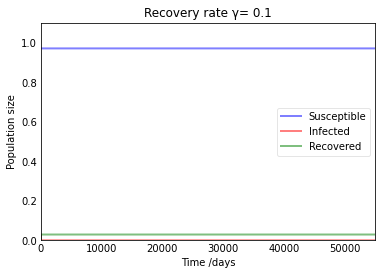

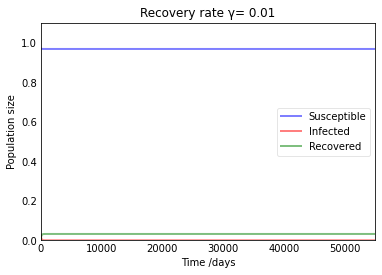

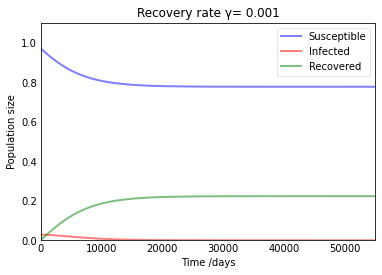

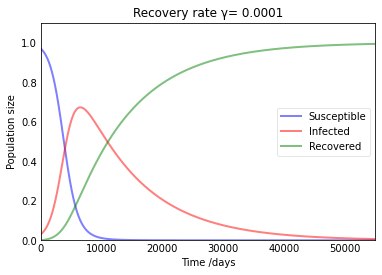

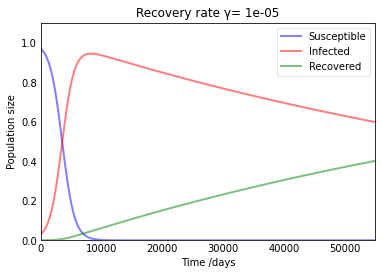

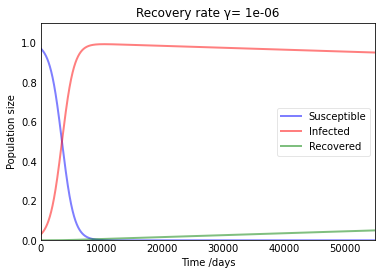

In [ ]:
# A.M.: 03116067 => x = 7

def solve_SIR(g):
    I0 = 17
    R0 = 0
    S0 = 570
    N = S0 + I0 + R0 #total population, N.
    beta = 10**(-3)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)

    t = np.linspace(0, 55000, 200000) # A grid of time points (in days)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    y0 = S0, I0, R0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #Integrate the SIR equations over the time grid, t.
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("Recovery rate γ= %r" %10**(-g))
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Population size')
    ax.set_ylim(0,1.1)
    ax.set_xlim(0,55000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()    
    
for i in np.linspace(1,6,num=6):
    solve_SIR(i)

#### Σχολιασμός SIR

Για $S(0)=570, I(0)=17, R(0)=0, β=10^{-3}$,
μεταβάλουμε το $γ$ και άρα στην ουσία και το $R_0=\frac{β}{γ}$.
*   Για $R_0=10^{-2}$ : Με βάση το παραπάνω διάγραμμα, ο πληθυσμός *Susceptible* παραμένει σταθερός κοντά στην μονάδα, οι *Infected* σχεδόν ακαριαία γίνονται μηδέν και οι *Recovered* αυξάνονται ακαριαία σχεδόν και μένουν σταθεροί κοντά στους 17 που ήταν αρχικά οι μολυσμένοι. Αυτό συμβαίνει διότι έχουμε πολύ χαμηλή τιμή του $R_0$, δηλαδή πολύ υψηλό mean recovery (healing) rate $γ$.

*   Για $R_0=10^{-1}$ : Παρόμοια αποτελέσματα παρατηρούμε και σε αυτό το διάγραμμα, διότι παραμένει ακόμα αρκετά υψηλή η τιμή του $γ$.

*   Για $R_0=1$ : Με βάση το παραπάνω διάγραμμα, ο πληθυσμός *Susceptible* πέφτει στην αρχή και σταθεροποιείται σε μια τιμή κοντά στο 0.8, οι *Recovered* αυξάνονται σχετικά γρήγορα στην αρχή και σταθεροποιούνται σε μια τιμή κοντά στο 0.2, ενώ οι *Infected* αυτή τη φορά πιο "αργά" πλησιάζουν προς το μηδέν.

*   Για $R_0=10$ : Από το παραπάνω διάγραμμα παρατηρούμε ότι το S(t) παρουσιάζει μια απότομη πτώση και σταθροποιείται στο μηδέν. Δηλαδή, όλος ο πληθυσμός στο τέλος θα μολυνθεί. Το Ι(t) παρουσίαζει αύξηση στην αρχή, με μέγιστη τιμή κοντά στο 0.7, και στην συνέχεια ομαλά σταθεροποιείται προς το μηδέν. Το R(t) αυξάνεται σχετικά γρήγορα και σταθεροποιείται τελικά στη μονάδα.

*   Για $R_0=10^{2}$ : Με βάση το παραπάνω διάγραμμα, ο πληθυσμός *Susceptible* πέφτει πάλι πολύ απότομα στην αρχή και μηδενίζεται. Οι *Infected* αυξάνονται αυτή τη φορά πολύ πιο γρήγορα και φτάνουν σχεδόν κοντά στη μονάδα, ενώ οι *Recovered* αυξάνονται με πιο αργό ρυθμό.

*   Για $R_0=10^{3}$ : Στην "χειρότερη" περίπτωση συγκριτικά με τις προηγούμενες, παρατηρούμε ότι όλος ο πληθυσμός θα μολυνθεί και το I(t) θα φτάσει την μονάδα πριν προλάβουν να ιαθούν. Αυτό συμβαίνει διότι, oι *Infected* αυξάνονται με πολύ γρήγορο ρυθμό, ενώ αντίθετα οι *Recovered* με πολύ αργό ρυθμό.

Στις τελευταίες δύο περιπτώσεις, παρατηρούμε ότι μέχρι τον χρόνο που φαίνεται στο διάγραμμα (>5000 time/days), οι *Infected* είναι περισσότεροι από τους *Recovered* και άρα χρειάζεται αρκετός χρόνος ώστε να εξαφανισθεί η πανδημία. Σε όλες τις περιπτώσεις πάντως, όταν ο χρόνος τείνει στο άπειρο, η επιδημία θα τείνει (έστω και πολύ αργά) προς distinction.
<br><br>
Συμπερασματικά, αντιλαμβανόμαστε ότι όσο μεγαλώνει το basic reproduction number ($R_0$), τόσο πιο γρήγορα αυξάνονται οι *Infected* και ταυτόχρονα τόσο πιο αργά αυξάνονται οι *Recovered*. Δηλαδή, έχουμε ταχύτερη μετάβαση από την κατάσταση S στην I, και πιο βραδύνουσα μετάβαση από την κατάσταση I στην R. 






### Άσκηση 2: SIS

Για το μοντέλο SIS, υιοθετείται η περίπτωση περιοδικού ρυθμού επαφής κόμβων. Κάτι τέτοιο μπορεί να αντιστοιχεί σε μια περιοδικότητα στη λήψη επιδημιών, πχ. σε ετήσια βάση όπως με τον συνιθισμένο ιό της γρίπης. Το σύνολο των διαφορικών εξισώσεων το οποίο περιγράφει αυτό το μοντέλο είναι:

$\frac{dI}{dt} = (\beta(t)N-a)I - \beta(t)I^2$

$\beta(t) = 2-1.8\cos(5t)$

Για τους συνδυασμούς παραμέτρων που φαίνονται στον ακόλουθο πίνακα, να δείξετε σε κοινό διάγραμμα την εξέλιξη του φαινομένου για κάθε συνδιασμό τιμών ($I(t),\beta(t))$

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\alpha$</td>
    <td style=text-align:center>$6$</td>
    <td style=text-align:center>$5$</td>
    <td style=text-align:center>$4$</td>
    <td style=text-align:center>$3$</td>
    <td style=text-align:center>$2$</td>
    <td style=text-align:center>$1$</td>
</tr>
<tr>
    <td style=text-align:center>$N$</td>
    <td style=text-align:center colspan='6'>$1$</td>
</tr>
</table>

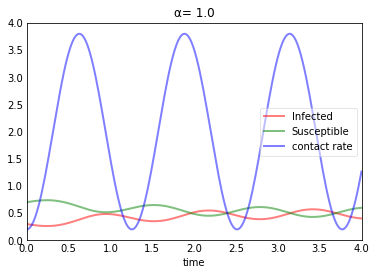

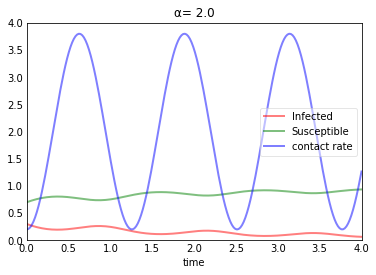

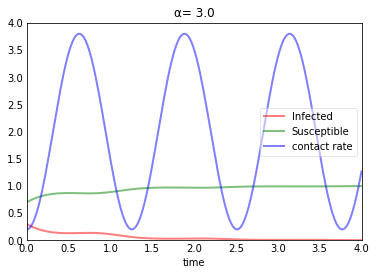

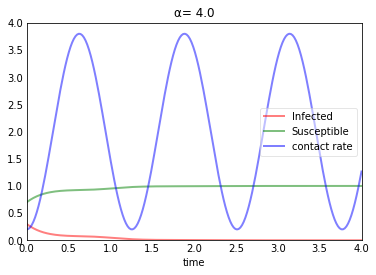

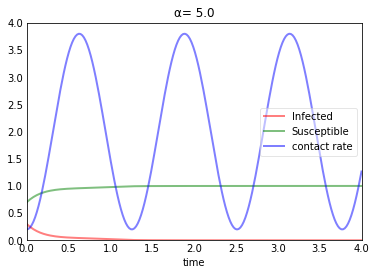

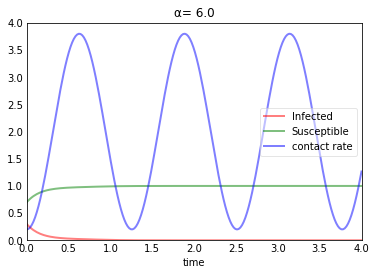

In [ ]:
def solve_SIS(g):
    I0 = 0.3
    N = 1 #population percentage
    S0 = N - I0
    alpha = g
    t = np.linspace(0, 4, 200) #time points
    
    def beta(t):
        r = 2 - 1.8*np.cos(5*t);
        return r

    # The SIS model differential equations.
    def deriv(y, t, N, alpha):
        I = y
        dIdt = (beta(t) * N-alpha) * I - beta(t) * (I**2)
        return dIdt
    
    y0 = I0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, alpha)) #Integrate the SIR equations over the time grid, t.
    I = ret
    
    def susc(N,I):
        s = N-I
        return s
    
    S = susc(N,I)
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("α= %r" %g)
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, S, 'g', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, beta(t), 'b', alpha=0.5, lw=2, label='contact rate')
    ax.set_xlabel('time')
    ax.set_ylim(0,4)
    ax.set_xlim(0,4)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
    
for i in np.linspace(1,6,num=6):
    solve_SIS(i)

#### Σχολιασμός SIS
Ο ρυθμός επαφής κόμβων $β$ μεταβάλεται περιοδικά από την τιμή 0.2 μέχρι την τιμή 3.8. Επειδή έχουμε μοντέλο SIS, o ρυθμός μεταβολής του $I(t)$ θα είναι αντίθετος με τον ρυθμό μεταβολής του $S(t)$. Γι αυτό και σε όλα τα διαγράμματα, όπως μεταβάλλεται ο αριθμός των *Susceptible*, με συμμετρικό τρόπο (αντίθετος) θα μεταβάλλεται και ο αριθμός των *Infected*.
<br><br>
Αρχικά, κανονικοποιημένα ως προς $N$, το $S(0)=0.7$ και άρα το $Ι(0)=0.3$. Όσο αυξάνεται η τιμή του $α$, τόσο πιο γρήγορα μεταβαίνουν οι *Susceptible* στην μονάδα και οι *Infected* στο μηδέν. Επίσης, όπως παρατηρούμε και από τα διαγράμματα, όσο μεγαλώνει το $α$ (4,5,6), τόσο λιγότερο επηρεάζει το $β$ τους αντίστοιχους πληθυσμούς. Αντιθέτως, για πιο χαμηλές τιμές του $α$ (1,2,3), γίνεται αντιληπτό ότι επηρεάζει σημαντικά η περιοδικότητα του $β((t)$. Συγκεκριμένα, όταν βρισκόμαστε σε περίοδο με υψηλό $β$, παρατηρούμε ότι έχουμε μείωση του $S(t)$ και όμοια αύξηση του $Ι(t)$. To αντίθετο συμβαίνει όταν βρισκόμαστε σε χρονική περίοδο με χαμηλές τιμές του $β$. 